In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions

In [2]:
 fr=pd.read_csv("D:/ALL DATASET/FRAUD-CRIME/train.csv")

In [3]:
fr.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
fr["is_attributed"].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [5]:
fr.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [6]:
fr["attributed_time"].value_counts()

2017-11-08 05:48:16    1
2017-11-07 14:35:55    1
2017-11-07 11:37:53    1
2017-11-09 13:03:34    1
2017-11-08 01:55:02    1
                      ..
2017-11-09 06:05:22    1
2017-11-09 05:27:49    1
2017-11-07 13:15:15    1
2017-11-07 23:07:41    1
2017-11-09 12:08:01    1
Name: attributed_time, Length: 227, dtype: int64

In [7]:
fr.drop("attributed_time",axis=1,inplace=True)

In [8]:
fr.drop("click_time",axis=1,inplace=True)

In [9]:
fr.head()

,ip,app,device,os,channel,is_attributed
0,87540,12,1,13,497,0
1,105560,25,1,17,259,0
2,101424,12,1,19,212,0
3,94584,13,1,13,477,0
4,68413,12,1,1,178,0


In [10]:
fr["device"].value_counts()

1       94338
2        4345
0         541
3032      371
3543      151
        ...  
420         1
37          1
549         1
2980        1
347         1
Name: device, Length: 100, dtype: int64

In [11]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   os             100000 non-null  int64
 4   channel        100000 non-null  int64
 5   is_attributed  100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [12]:
fr["device"].value_counts()

1       94338
2        4345
0         541
3032      371
3543      151
        ...  
420         1
37          1
549         1
2980        1
347         1
Name: device, Length: 100, dtype: int64

In [ ]:
## scaling

In [13]:
fr.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed'], dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc_x=StandardScaler()

In [16]:
x=pd.DataFrame(sc_x.fit_transform(fr.drop(["is_attributed"],axis=1),),
              columns=['ip', 'app', 'device', 'os', 'channel'])

In [17]:
y=fr["is_attributed"]

In [18]:
fr["is_attributed"].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [21]:
x_train.shape

(70000, 5)

In [22]:
y_train.shape

(70000,)

In [23]:
y_test.shape

(30000,)

In [24]:
x_test.shape

(30000, 5)

In [25]:
y_test.shape

(30000,)

In [26]:
x.head()

,ip,app,device,os,channel
0,-0.053209,-0.003205,-0.079992,-0.175506,1.758875
1,0.204827,0.866860,-0.079992,-0.104004,-0.075795
2,0.145602,-0.003205,-0.079992,-0.068253,-0.438104
3,0.047657,0.063724,-0.079992,-0.175506,1.604701
4,-0.327097,-0.003205,-0.079992,-0.390010,-0.700200


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_attributed, dtype: int64

In [ ]:
## RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf=RandomForestRegressor()

In [30]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import confusion_matrix

In [31]:
x_train.shape

(70000, 5)

In [32]:
x_test.shape

(30000, 5)

In [33]:
y_train.shape

(70000,)

In [34]:
y_test.shape

(30000,)

In [35]:
y_rf_pred=rf.predict(x_test)

In [36]:
rf.score(x_test,y_test)

0.16095846664203572

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lm =LogisticRegression()

In [37]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_lm_pred=lm.predict(x_test)

In [39]:
lm.score(x_test,y_test)

0.9977

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,y_lm_pred)

array([[29931,     1],
       [   68,     0]], dtype=int64)

In [42]:
pd.crosstab(y_test,y_lm_pred,margins=True)

col_0,0,1,All
is_attributed,,,
0,29931,1,29932
1,68,0,68
All,29999,1,30000


In [ ]:
Accuracy=99.77%%

In [43]:
from sklearn import metrics

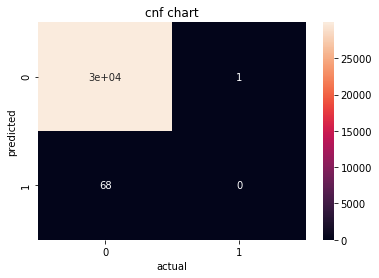

In [44]:
cnf_lm=metrics.confusion_matrix(y_test,y_lm_pred)
sns.heatmap(pd.DataFrame(cnf_lm),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("cnf chart")
plt.show()

In [ ]:
## roc curve

In [45]:
from sklearn.metrics import roc_curve

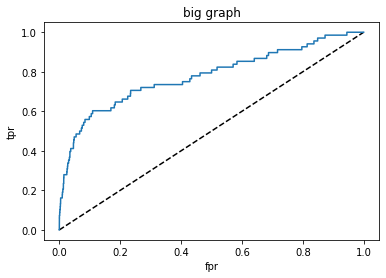

In [46]:
y_lm_prob=lm.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lm_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="lm")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("big graph")
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_lm_prob)

0.7780009688627555

In [ ]:
### nieboius theomrm

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb=GaussianNB()

In [50]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
y_gnb_pred=gnb.predict(x_test)

In [52]:
gnb.score(x_test,y_test)

0.9925666666666667

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,y_gnb_pred)

array([[29767,   165],
       [   58,    10]], dtype=int64)

In [55]:
pd.crosstab(y_test,y_gnb_pred,margins=True)

col_0,0,1,All
is_attributed,,,
0,29767,165,29932
1,58,10,68
All,29825,175,30000


In [ ]:
99.25%%

In [ ]:
## dec tree 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
tree=DecisionTreeClassifier(max_depth=10,random_state=0,
                           criterion="gini")

In [59]:
tree=DecisionTreeClassifier(max_depth=10,random_state=0,criterion="gini")

In [60]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [62]:
y_tree_pred=tree.predict(x_test)

In [63]:
tree.score(x_test,y_test)

0.9971333333333333

In [ ]:
99.71%%

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_test,y_tree_pred)

array([[29892,    40],
       [   46,    22]], dtype=int64)

In [68]:
pd.crosstab(y_test,y_tree_pred,margins=True)

col_0,0,1,All
is_attributed,,,
0,29892,40,29932
1,46,22,68
All,29938,62,30000


In [ ]:
99.71%%%

In [69]:
from sklearn import metrics

In [70]:
cnf_tree=metrics.confusion_matrix(y_test,y_tree_pred)

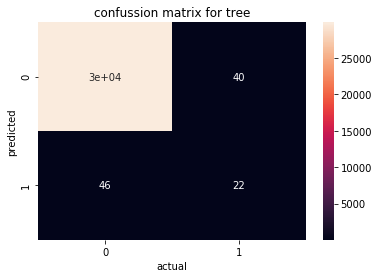

In [71]:
sns.heatmap(pd.DataFrame(cnf_tree),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("confussion matrix for tree")
plt.show()

In [72]:
from sklearn.metrics import roc_curve

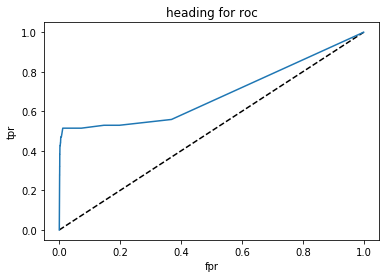

In [73]:
y_tree_prob=tree.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_tree_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="tree")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("heading for roc")
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_tree_prob)

0.6871727877306207

In [ ]:
###  KNN 

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_scores=[]
test_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
train_scores.append(knn.score(x_train,y_train))
test_scores.append(knn.score(x_test,y_test))

In [78]:
train_score=[]
test_score=[]
for i in range (1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
train_score.append(knn.score(x_train,y_train))
test_score.append(knn.score(x_test,y_test))

In [79]:
max_train_score=max(train_score)
train_score_ind=[i for i,v in enumerate(train_score) if v==max_train_score]
print("max train score % {}  and k={}".format(max_train_score*100,list(map(lambda x: x+1,train_score_ind))))

max train score % 99.77571428571429  and k=[1]


In [81]:
max_test_score=max(test_score)
test_score_ind=[i for i, v in enumerate(test_score) if v==max_test_score]
print("max test score {}and k={}".format(max_test_score*100,list(map(lambda x: x+1,test_score_ind))))

max test score 99.77333333333334and k=[1]


In [82]:
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [84]:
y_knn_pred=knn.predict(x_test)


In [85]:
knn.score(x_test,y_test)

0.9966666666666667

In [ ]:
99.66

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test,y_knn_pred)

array([[29884,    48],
       [   52,    16]], dtype=int64)

In [88]:
pd.crosstab(y_test,y_knn_pred,margins=True)

col_0,0,1,All
is_attributed,,,
0,29884,48,29932
1,52,16,68
All,29936,64,30000


In [ ]:
99.66

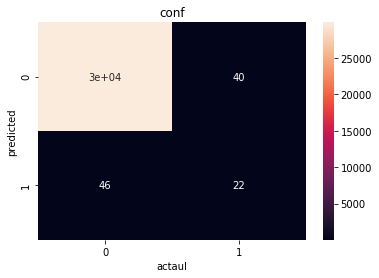

In [90]:
cnf_knn=metrics.confusion_matrix(y_test,y_tree_pred)
sns.heatmap(pd.DataFrame(cnf_knn),annot=True)
plt.xlabel("actaul")
plt.ylabel("predicted")
plt.title("conf")
plt.show()

In [91]:
from sklearn.metrics import roc_curve

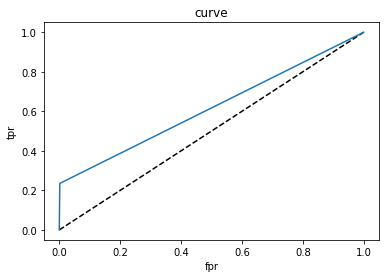

In [92]:
y_knn_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_knn_pred)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="knn")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("curve")
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_knn_prob)

0.6168452413706362

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
par_grid={"n_neighbors":np.arange(0,15)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,par_grid,cv=5)
knn_cv.fit(x,y)
print("best score:"+str(knn_cv.best_score_))
print("best params:"+str(knn_cv.best_params_))

best score:0.9978200000000002
best params:{'n_neighbors': 9}


In [37]:
import xgboost as xgb

In [38]:
xgb_model=xgb.XGBClassifier(n_estimators=200,
                           objective="binary:logistic",
                           random_state=0)

In [39]:
xgb_model=xgb.XGBClassifier(n_estimators=100,
                           ibjective="binary:logistic",
                           random_state=0)

In [40]:
xgb_model.fit(x_train,y_train)

[13:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ibjective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              ibjective='binary:logistic', importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_xgb_pred=xgb_model.predict(x_test)

In [42]:
xgb_model.score(x_test,y_test)

0.9979333333333333

In [43]:
import xgboost as xgb
xg=xgb.XGBClassifier(n_estimators=100,
                    objective="binary:logistic",
                    random_state=0)
xg.fit(x_train,y_train)
y_xg_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.9979333333333333

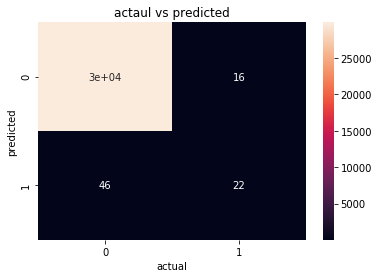

In [44]:
from sklearn import metrics
cnf_xgb=metrics.confusion_matrix(y_test,y_xgb_pred)
sns.heatmap(pd.DataFrame(cnf_xgb),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actaul vs predicted")
plt.show()

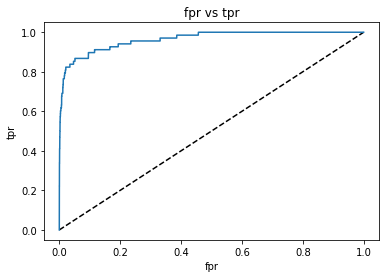

In [46]:
from sklearn.metrics import roc_curve
y_xgb_proba=xgb_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_xgb_proba)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="xgb")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("fpr vs tpr")
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_xgb_proba)

0.9642744141622972

In [ ]:
## roc=96.42